In [1]:
from jupyterthemes import jtplot
from jupyterthemes.stylefx import set_nb_theme
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style('solarizedl')
set_nb_theme('solarizedl')

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
#rcParams['figure.figsize'] = (22,5) # doesnt work inline, causes headache otherwise

# Outline of Part 2, Analysis of sorted spikes 

## 1) Set up, paths
## 2) Functions - easier than you think!
## 3) Load and inspect spikes
### a) Spike time raster 
### b) Binned raster
==========================================================================
### c) Zero in on a feature of data
## 4) Peristimulus time histogram

Download and extract two files from http://data.cortexlab.net/singlePhase3/data/:

       1) dataset.zip (3 mins)

       2) pc_features.npy (7 mins)

       3) Hopkins_20160722_g0_t0.imec.ap_CAR.bin (several hours)


## Environment setup for analysis
conda create -n spike_tutorial

conda activate spike_tutorial

conda install -y matplotlib pandas xarray numpy tqdm scipy spyder h5py requests joblib

pip install spykes

conda run spyder 



In [3]:
# Import basic libraries 
import sys, matplotlib.pylab as plt, numpy as np,tqdm
# Insert your own path here! Copy+paste but FORWARD slashes
sys.path.append('/Users/myroshnychenkm2/mmy/py/teaching/ukraine/spikes_tutorial/')
import spikes_tutorial_dependencies as spike_deps 

In [4]:
# Create pdf. We'll save all our results here (look ma no hands!)
pdf=spike_deps.make_report('/Users/myroshnychenkm2/Downloads/dataset/')

In [5]:
neuron_ids_huge, spike_times_all_neurons_huge =spike_deps.load_spikes_from_phy('/Users/myroshnychenkm2/Downloads/dataset/')

Selecting only good spikes: 100%|██████████| 242/242 [00:05<00:00, 44.91it/s]


# Housekeeping detour
## Inspecting variables
## Inspecting functions 

# Visualizing spiketimes without binning 

In [6]:
# Let's inspect the spikes
print(neuron_ids_huge)
print(spike_times_all_neurons_huge)

[  13   13   13 ... 1209 1209 1209]
[  10.07096667   32.3822       46.20356667 ... 3773.10953333 3773.46326667
 3773.48606667]


# What are the sizes of each of these variables?

In [7]:
# Limit the number of spikes we're dealing with but keep full variables
neuron_ids = neuron_ids_huge[spike_times_all_neurons_huge<70]
spike_times_all_neurons = spike_times_all_neurons_huge[spike_times_all_neurons_huge<70]

In [8]:
# Let's inspect the timestamps from one neuron
id_of_interest = neuron_ids[300]
spike_times_of_interest=spike_times_all_neurons[neuron_ids == id_of_interest]
print(spike_times_of_interest)

[ 0.1449      0.24753333  0.46693333  0.62893333  0.65033333  1.21656667
  1.2314      1.2845      1.77893333  1.78703333  2.06783333  2.25276667
  2.26203333  2.3779      3.0921      3.11793333  3.12776667  3.13796667
  3.75693333  3.7698      4.6546      4.7072      4.71426667  4.80536667
  4.85086667  4.9817      4.98783333  5.06946667  5.33776667  6.07223333
  6.08506667  6.2339      7.34353333  7.55986667  8.1842      8.192
  8.2121      8.52053333  8.52916667  9.02863333  9.04153333  9.0639
  9.29206667  9.30023333  9.5331      9.55053333 10.061      10.0732
 10.3263     10.33643333 10.8437     11.17213333 11.46903333 11.65286667
 11.68153333 11.6925     11.72723333 11.83643333 11.8486     11.8821
 11.94126667 11.97043333 12.16116667 12.23776667 12.25543333 13.04003333
 13.17443333 13.27843333 13.2862     13.29753333 13.40853333 13.42433333
 13.6446     13.6625     13.74406667 13.75823333 14.16746667 14.18983333
 14.36326667 14.36953333 14.39746667 14.4203     14.45683333 14.6590

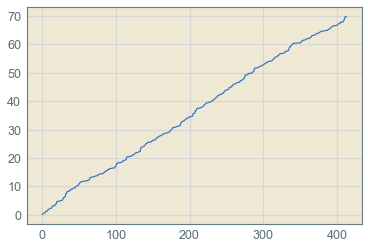

In [9]:
# Plot spiketimes
plt.plot(spike_times_of_interest)
pdf.savefig() # save figure to pdf

## What are neurons' identities in this plot? 
## Why is the curve progressively rising?
## What's on the x- and y- axes?


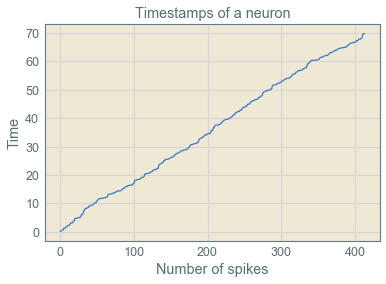

In [10]:
# Let's inspect the timestamps from one neuron - version 2
plt.plot(spike_times_of_interest)
plt.title('Timestamps of a neuron')
plt.ylabel('Time')
plt.xlabel('Number of spikes')
pdf.savefig() # save figure to pdf

 What is a plot like this good for? (Hint: what would the change in firing rate look like?)

# Visualizing raster of spiketimes 

In [11]:
# Raster of one neuron, by hand
plt.xlim([0, spike_times_of_interest.max()])
for ... in ...:
    plt.scatter(x=this_timestamp, y=1,marker='|',color='black')
    plt.show()
    plt.pause(.01)

SyntaxError: can't assign to Ellipsis (<ipython-input-11-b66e70bbb853>, line 3)

This is our first For loop! How does it work?


In [ ]:
# Whole raster for one neuron, no loop 
%matplotlib tk # slide housekeeping, nothing to see here
plt.scatter(x=spike_times_of_interest,
            y=np.ones(spike_times_of_interest.shape[0]),
            marker='|')
pdf.savefig() # save figure to pdf


In [ ]:
# For all neurons now
plt.scatter(x=spike_times_all_neurons,
            y=neuron_ids, marker='|', c='k', alpha=.7)
pdf.savefig() # save figure to pdf



# visualizing binned raster 


In [ ]:
# Use my function with xarray
raster = spike_deps.bin_neurons(spike_times_all_neurons, neuron_ids, bin_size=.05)
print(raster) # xarray
raster.plot(robust=True)
plt.show()

In [ ]:
# Convenient one-liners to "slice" the raster by time or neurons
raster.sel(Single_unit_id=slice(20,1200), Time=slice(60,65)).plot(robust=True)
## Do you see the difference? We are missing-ish the up states

In [ ]:
# PSTH
lfp, down_states = spike_deps.identify_down_states(
    spike_times_all_neurons_huge)

In [ ]:
# PSTH based on homemade code
raster = spike_deps.bin_neurons(spike_times_all_neurons_huge, neuron_ids_huge, bin_size=.005)
psth=[]
for down_state in tqdm.tqdm(down_states):
    # get raster
    raster_now=raster.sel(Time=slice(down_state-.100,
                                     down_state+.300))
    # add raster to psth
    psth.append(raster_now.sel(Single_unit_id=241).values[:80]) # Note no equals sign
psth_all=np.vstack(psth)
# With for loop as the basic building block, you can do anything!
## plot psth
plt.pcolormesh(psth_all)
## Q: What are the axes?

In [ ]:
# ============= Kording psth toolbox is a lot easier ===============
# make a psth object using the toolbox:
psth_object = spike_deps.PSTH.make_psth(down_states)
# make raster using toolbox:
spykes_times = spike_deps.PSTH.spykes_get_times(spike_times_all_neurons_huge, neuron_ids_huge)
# Get mean PSTH for all neurons
pop, all_psth = spike_deps.PSTH.spykes_summary(spikes=spykes_times, spykes_df=psth_object, 
                                               event='trialStart', window=[-300, 400], bin_size=5, plotose=True)
# Plot mean PSTH for all neurons
pop.plot_heat_map(all_psth, sortby='rate', sortorder='ascend', normalize=None, colors=['viridis'])  # or latency
## Note the periodicity
## Q: Do you think if you flip the detection, the result will be similar and opposite? Hint: Inspect the raster.
# Test your hypothesis by setting down_states = np.where(lfp > 90)[0]
pdf.close() # This finalizes the pdf so that it's viewable